## Portfolio Part 4


In this Portfolio task, I will be working on the Titanic Data that was obtained from [Kaggle](https://www.kaggle.com/c/titanic/data).This dataset contains data regarding the sinking of the "Unsinkable" Titanic ship in the 1910s. The details of the passengers on the ship like their name, sex, age, embarkment points and whether they managed to survive the disaster is recorded in this dataset. There are two values regarding the 'Survived' column with 1 indicating the passenger survived whereas 0 indicating that the passenger sadly passed away. 

[Image Source](https://nitter.net/Dominiq71166567)
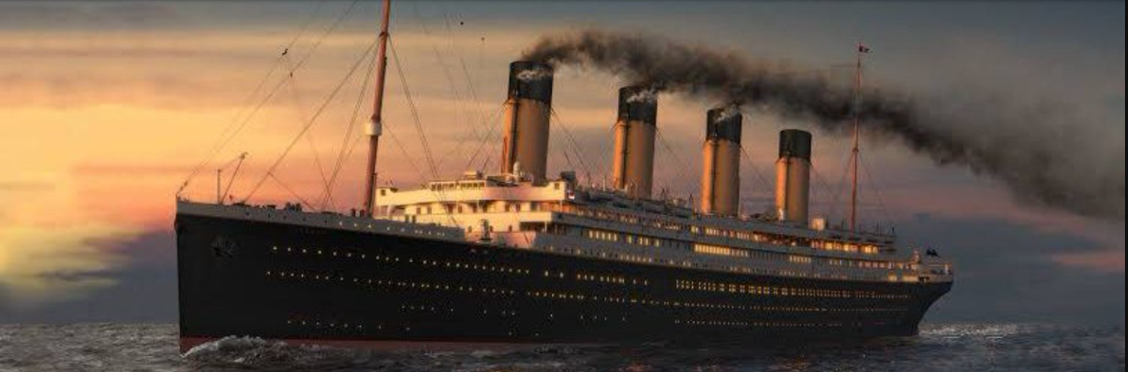



The header of the csv file is shown below. 


| PassengerId | Survived | Pclass | Name| Sex | Age | SibSp | Parch | Ticket| Fare | Cabin | Embarked
    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
    
####  Description of Fields

* __PassengerId__ - the passenger's Unique ID
* __Survived__ - the passenger's survival (0 = No; 1 = Yes)
* __Pclass__ - the passenger's Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* __Name__ - the passengers's occupation
* __Sex__ - the passenger's sex
* __Age__ - the passenger's age
* __SibSp__ - number of siblings/ spouse on board
* __Parch__ - number of parents/ children on board
* __Ticket__ - ticket number
* __Fare__ - passenger fare
* __Cabin__ - the passenger's cabin number
* __Embarked__ - port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)



#### My high level goal in this portfolio is divided into following parts:
1. **Data Exploration:** Finding out the Correlations, Visualizing different variables and gaining useful insights.
2. **Data Preparation:** Applying necessary preprocessing techniques to prepare the data for modelling. This involves processs of checking for null values, outliers etc.
3. **Data Modelling:** Building and Evaluating predictive models for Survival from available Features. Firstly, a simple logistic regression model is used and its accuracy is evaluated. After that, a function consisting of all the applicable supervised learning models covered in the lectures is created and its level of accuracy is evaluated.
4. **Selecting the Machine Learning Best Model:** The performance and accuracy of different machine learning models are compared with each other and the model with the best accuracy of predicting the survivability is determined.


In [4]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [5]:
#Reading the csv file
df = pd.read_csv('files/train.csv')

## Part 1: Data Exploration

In [6]:
# Checking the first 5 rows of the Dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Examine the data: check number of rows and number of columns
print("Number of Rows:",df.shape[0])
print("Number of Columns:",df.shape[1])

Number of Rows: 891
Number of Columns: 12


In [8]:
# Display the statistical summary of the dataframe
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Correlation of Numerical variables with Survival

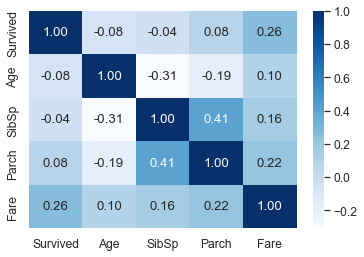

In [9]:
sns.set(font_scale=1.1)
ax = sns.heatmap(df[['Survived','Age','SibSp','Parch','Fare']].corr(),annot = True, fmt = '.2f', cmap = 'Blues')

### Observations from Correlation Heat Map
* Fare has the highest correlation coefficient. This tells us that fare is highly correlated with survival. For example: If a passengers pays a higher fair, the passenger would have a higher rate of survival.
* People of older age has a higher chance of dying as age has a negative correlation with Survived (-0.08)
* SipSp also has a negative correlation with survived. This may indicate that passenger who have siblings or spouse on board has lower chance of survival.
* Lastly, Parch seems to have postive correlation with Survived. Therefore, this may explain that people with parents or children on board were given higher prority thus,having higher chance of survival.

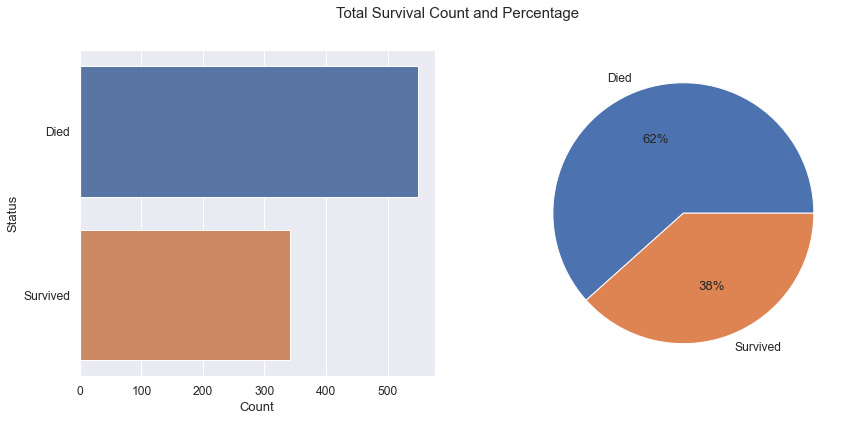

Total Number of people who died: 549
Total Number of people who died: 12


In [10]:
#Visualization of The total passengers on Titanic who survived and died
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14,6))
fig.suptitle("Total Survival Count and Percentage",size=15)

data = [df[df['Survived'] == 0].shape[0], df[df['Survived'] == 1].shape[0]]
labels = ['Died', 'Survived']

colors = sns.color_palette('deep')[0:5]

#creating side by side comparative plots
ax2.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
sns.barplot(data,labels,ax=ax1)
ax1.set_xlabel('Count',fontsize=13)
ax1.set_ylabel('Status',fontsize=13)
plt.show()

#Printing the values
print("Total Number of people who died:",df[df['Survived'] == 0].shape[0])
print("Total Number of people who died:",df[df['Survived'] == 1].shape[1])

- Out of 891 people, 549 people (62%) ended up dying which is really sad as they all were on what was believed to be the **"Unsinkable Ship"**.

Mean age of person on board 30


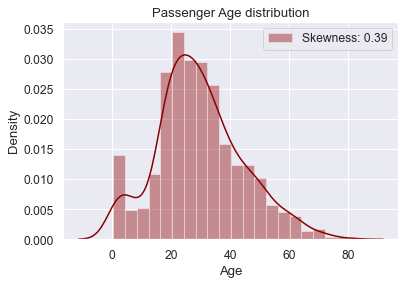

In [11]:
# Passenger Age Distribution 
sns.distplot(df['Age'],color="DarkRed", label = "Skewness: %.2f"%(df['Age'].skew()))
plt.legend(loc = 'best')
plt.title("Passenger Age distribution")
print("Mean age of person on board",round(df['Age'].mean()))

* Most of the survivors on board are on the range from 20's to 30's
* The mean age of the passengers on board is 30

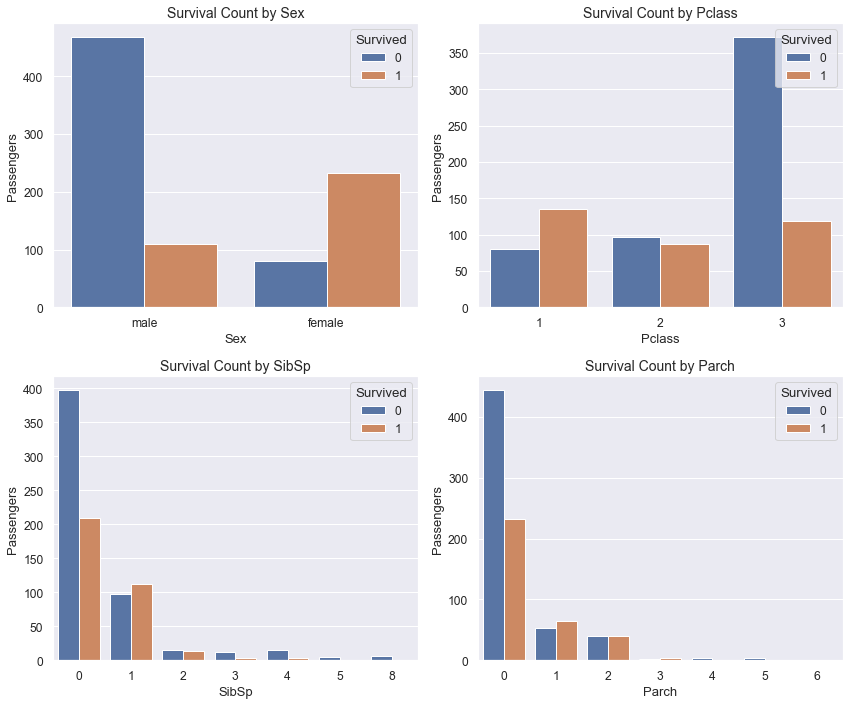

In [12]:
# Visualization of Survival Count based on Various features
cols = ['Sex','Pclass','SibSp','Parch']

n_rows = 2
n_cols = 2

#The subplot grid and figure size of each graph
fig, axs = plt.subplots(n_rows,n_cols, figsize = (n_cols * 6, n_rows * 5))

for r in range(0,n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c #index to go through the number of columns
        ax = axs[r][c] # show where to position each sub plot
        sns.countplot(df[cols[i]], hue = df['Survived'],ax=ax)
        ax.set_title('Survival Count by '+cols[i],fontsize=14)
        ax.legend(title = 'Survived', loc = 'upper right')
        ax.set_xlabel(cols[i],fontsize=13)
        ax.set_ylabel('Passengers',fontsize=13)
        
        
plt.tight_layout()

**Key Insights from Visualization**
* There were a lot more male passengers than female.
* Over 400 male passengers ended up losing their life. On the other hand, less than 100 female ended up not surviving. 
* The chances of survival of people in the third class were very low as more than 350 passengers in that class didn't survive. The lower the PClass, the higher the survival rate. 
* If the person didn't have any spouse or sibling on board, then the likelihood of survival is very low as only around 200 people ended up surviving out of 600.
* If you didn't a have parent or a child on board, you were likely to not survive as more than 400 passenger who came alone didn't survive.

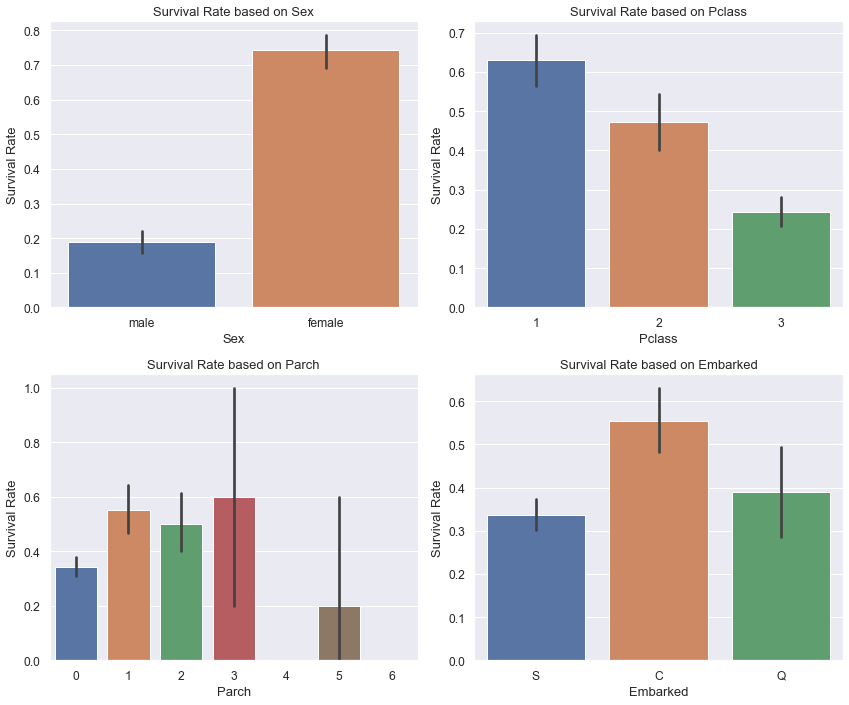

In [13]:
# Visualization of Survival Rate based on Various features
cols = ['Sex','Pclass','Parch','Embarked',]

n_rows = 2
n_cols = 2

#The subplot grid and figure size of each graph
fig, axs = plt.subplots(n_rows,n_cols, figsize = (n_cols * 6, n_rows * 5))

for r in range(0,n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c #index to go through the number of columns
        ax = axs[r][c] # show where to position each sub plot
        sns.barplot(x=cols[i],y='Survived', data = df, ax=ax)
        ax.set_title("Survival Rate based on "+cols[i], size =13)
        ax.set_xlabel(cols[i],fontsize=13)
        ax.set_ylabel('Survival Rate',fontsize=13)
        
plt.tight_layout()

**Key Insights**
* Gender payed a great role in determining whether the passenger survived or not. Females had Higher survival rate of 74% in comparison to that of males 19%. This may be because females and children were given more priority during this disaster.
* Majority of people on the first and the second class survived in comparison to passenger's whose class was 3. Lower the Passenger Class, higher the chance of survival. This does make sense as Wealthier passengers have high chance of survival because they were given more priority.
* If the passenger doesn't have any parents/children on board, the chance of survival is low.
* The passengers that embarked in Cherbourg had high survival rate whereas passengers who embarked from Southampton had the lowest rate of survival.

## Part 2: Data Preparation
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class. For example:

### Checking for NaN values
We can use seaborn to create a simple heatmap to see where the missing data are!

In [14]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

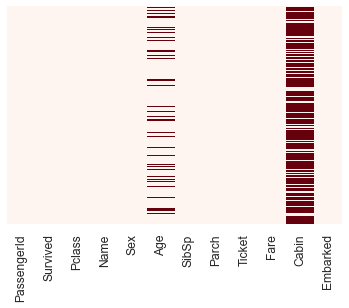

In [15]:
#Visualization of missing values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Reds')

From the heat map shown above, we can see that there are a lot of null values for Cabin. More 600 values are null for cabin, therefore, removing this whole column would be better choice in this scenario. On the other hand, 20% of the Age data is missing. This proportion is small enough to make resonable replacement by taking the mean of the age of percengers on board.
Embarked also has two of the values missing. The whole two rows where Embarked is null will be dropped

Text(0.5, 1.0, 'Pclass By Age Box-Plot')

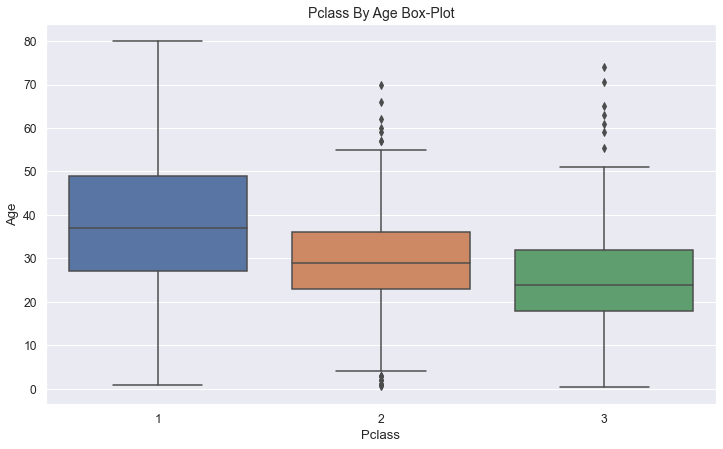

In [16]:
# Comparing Age with PClass
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df)
plt.title("Pclass By Age Box-Plot", size = 14)

In the Box-Plot displayed above, we can see that wealthier passengers in the higher classes tend to be older, which makes sense. Since there is a positive correlation between age and pclass, we'll be using these average age values to impute based on Pclass for Age.

**Mean value of Age for each PClass**
* **PClass 1:** 37 years
* **PClass 2:** 29 years
* **PClass 3:** 24 years

### Replacing Null Values in Age with its mean value based on PClass

In [17]:
#Creating a function to replace the null age values with the mean age based on the PClass
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [18]:
#Calling the function to replace the NaN values in Age.
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

**Dropping the columns we won't be using**
* PassengerId: It is unique for every data, thus, won't help in predicting the survivability
* Cabin: More than 600 values are missing on the Cabin Column
* Name: Isn't a useful feature for modelling
* Ticket: Is unique for every data, therefore, won't help us in predicting survivability

In [19]:
df.drop(['PassengerId','Cabin','Name','Ticket'],axis=1,inplace=True)

In [40]:
#Dropping the remaining rows where null values exist
df.dropna(inplace=True)

In [42]:
print(df.shape)
print("2 rows and 4 columns were dropped.")
df.isna().sum()

(889, 8)
2 rows and 4 columns were dropped.


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Converting Categorical Variables to Numerical using Ordinal Encoding 

In [38]:
#Searching for Categorical Variables
df.dtypes

Survived      int64
Pclass        int64
Sex            int8
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked       int8
dtype: object

In order to proceded towards building machine learning models, the type 'object' are converted to numerical values so that these features can be used to predict the survivability.


In [23]:
#Converting Categorical to Numerical values
df['Sex'] = df['Sex'].astype('category')
df['Sex'] = df['Sex'].cat.codes

df['Embarked'] = df['Embarked'].astype('category')
df['Embarked'] = df['Embarked'].cat.codes
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


**Updated Field Description**

* __Sex__ - the passenger's sex (0 = Male; 1 = Female)
* __Embarked__ - port of embarkation (0 = Cherbourg; 1 = Queenstown; 2 = Southampton)

The Data is now ready for modelling

## Part 3: Data Modelling

Since the size of the dataset isn't very large and there are clearly labeled data for training, I will be using Suerpervised Learning Models and evaluate its performances.

### Defining a baseline performance using a Simple Logistic Regression Model

In [24]:
# Feature Selection
X = df.drop('Survived',axis=1) #Selecting our predictors
y = df['Survived'] #Selecting our Reponse Variable

In [25]:
#Train Test Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

* 80% of the data is used to train the Logistic Regression model and the remaining 20% of the data will be used to test and evaluate the model

In [26]:
#Scale the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#### Performing Recursive Feature Estimation

In [27]:
from sklearn.feature_selection import RFE

# Estimating accuracy score on test by using different number of features
acc_scores = []
for i in range(1,6):
    clf = LogisticRegression()
    rfe = RFE(estimator=clf, n_features_to_select=i)
    # training model
    rfe.fit(X_train, y_train)
    # predicting on test set
    y_pred = rfe.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    # print this
    print("Accuracy on test set using", i, "features: ", round(acc_score,4))
    # append to the list
    acc_scores.append(acc_score)


Accuracy on test set using 1 features:  0.7865
Accuracy on test set using 2 features:  0.7865
Accuracy on test set using 3 features:  0.7865
Accuracy on test set using 4 features:  0.809
Accuracy on test set using 5 features:  0.8146


Number of features to select: 5
Final Accuracy Score: 0.7865


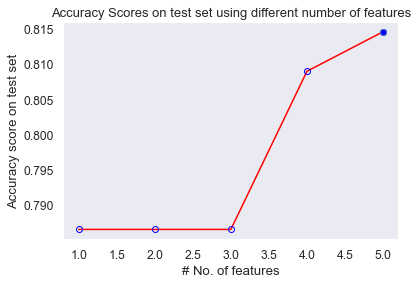

In [28]:
#Visualisation of the accuracy score using different number of features
estimator = LogisticRegression()
acc_scores = []
for i in range(1, 6):
    selector = RFE(estimator, i)
    selector = selector.fit(X_train, y_train)
    supp = selector.get_support()

    predicted = selector.predict(X_test)
    acc_score = accuracy_score(y_test, predicted)
    acc_scores.append(acc_score)
  
best = 1
for item in acc_scores:
    if item > acc_scores[best - 1]:
        best = acc_scores.index(item) + 1

plt.grid()   
plt.xlabel('# No. of features')
plt.ylabel('Accuracy score on test set')
plt.plot(range(1, 6), acc_scores, marker = 'o', color = 'red', markeredgewidth = 1 ,markeredgecolor = 'blue', markerfacecolor = 'None')
plt.plot(best, acc_scores[best-1], marker = 'o', markerfacecolor = 'blue')
print("Number of features to select:", best)
plt.title("Accuracy Scores on test set using different number of features", size=13)
print("Final Accuracy Score:",0.7865)

* We can clearly observe hat the accuracy of the test increases as number of features increases. Using 5 feature generated the highest accuracy score of 0.7865

### Creating functions with various Advanced Machine Learning Models

In [29]:
def models(X_train,Y_train):
    
    #Logistic Regression model
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, y_train)
    
    #K-Nearest Neighbors
    from sklearn.neighbors import KNeighborsClassifier
    # Through Process of Trial and error, The optimal k value which received highest accuracy was 4.
    knn = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski',p=2) 
    knn.fit(X_train, y_train)
    
     #Gaussian Naive Bayes
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, y_train)
    
    #Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
    tree.fit(X_train, y_train)
    
    #Random Forest Classifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10,criterion = 'entropy', random_state = 0)
    forest.fit(X_train, y_train)
    
    #Print Training accuracy for each model
    print("[0]Logistic Regression Training Accuracy: ", log.score(X_train,y_train))
    print("[1]K-Nearest Neighbors Training Accuracy: ", knn.score(X_train,y_train))
    print("[2]Gaussian Naive Bayes Training Accuracy: ", gauss.score(X_train,y_train))
    print("[3]Decision Tree Training Accuracy: ", tree.score(X_train,y_train))
    print("[4]Random Forest Training Accuracy: ", forest.score(X_train,y_train))

    
    return log, knn, gauss, tree, forest

In [30]:
model = models(X_train,y_train)

[0]Logistic Regression Training Accuracy:  0.8030942334739803
[1]K-Nearest Neighbors Training Accuracy:  0.8551336146272855
[2]Gaussian Naive Bayes Training Accuracy:  0.790436005625879
[3]Decision Tree Training Accuracy:  0.9859353023909986
[4]Random Forest Training Accuracy:  0.9690576652601969


In [31]:
#Storing the accuracy score for testset for every model in a variable
log_ac=accuracy_score(y_test,model[0].predict(X_test))
knn_ac=accuracy_score(y_test,model[1].predict(X_test))
gauss_ac=accuracy_score(y_test,model[2].predict(X_test))
tree_ac=accuracy_score(y_test,model[3].predict(X_test))
forest_ac=accuracy_score(y_test,model[4].predict(X_test))

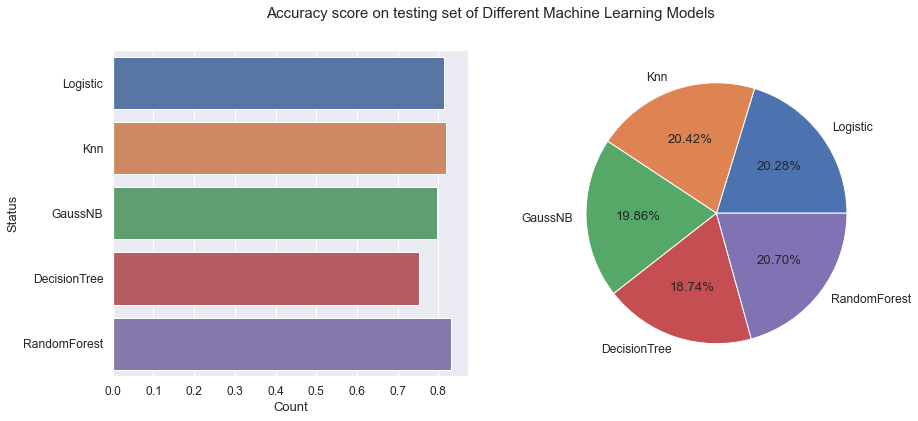

Best models (From best Accuracy to worst on testing set)

Random Forest Testing Accuracy 0.8315
K-Nearest Neighbors Testing Accuracy 0.8202
Logistic Regression Testing Accuracy 0.8146
Gaussian Naive Bayes Regression Testing Accuracy 0.7978
Decision Tree Testing Accuracy 0.7528


In [37]:
#Visualization of The total passengers on Titanic who survived and died
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14,6))
fig.suptitle("Accuracy score on testing set of Different Machine Learning Models",size=15)

data = [log_ac,knn_ac,gauss_ac,tree_ac,forest_ac]
labels = ['Logistic', 'Knn','GaussNB','DecisionTree','RandomForest']

colors = sns.color_palette('deep')[0:5]

#creating side by side comparative plots
ax2.pie(data, labels = labels, colors = colors, autopct='%.2f%%')
sns.barplot(data,labels,ax=ax1)
ax1.set_xlabel('Count',fontsize=13)
ax1.set_ylabel('Status',fontsize=13)
plt.show()

#Printing the values
print("Best models (From best Accuracy to worst on testing set)")
print()
print("Random Forest Testing Accuracy",round(forest_ac,4))
print("K-Nearest Neighbors Testing Accuracy",round(knn_ac,4))
print("Logistic Regression Testing Accuracy",round(log_ac,4))
print("Gaussian Naive Bayes Regression Testing Accuracy",round(gauss_ac,4))
print("Decision Tree Testing Accuracy",round(tree_ac,4))


      

### Observation and Analysis
* Random Forest seems to be the best model to predict survivability as it has the highest accuracy on both training and testing data, followed by K-Nearest Neighbors.
* Decision Tree seems to be the least accurate model with a accuracy score of only 0.75 on Testing Data But it had the highest accuracy on the training data (0.985). This may be due to overfitting of data. In general, Decision Trees work great with the data used to train them, but they are not flexible when it comes to classifying new samples. 
* Random Forests combine the simplicity of decision trees with flexibility resulting in a vast improvement in accuracy as seen with the increased accuracy on testing data.
* The difference between the accuracy score of different model isn't that huge. Every model does a great job in predicting the survivability of the passenger





### Confusion Matrix 

**Terminologies**
* True Positives: When the passenger didn't survive and the model predicts correctly   
* True Negatives: When the passenger survived but the model predicts correctly
* False Positives (Type I Error): When the passenger died but the algorithm said it didn't 
* False Negatives (When the passenger survived and the algorithm said he/she died) 

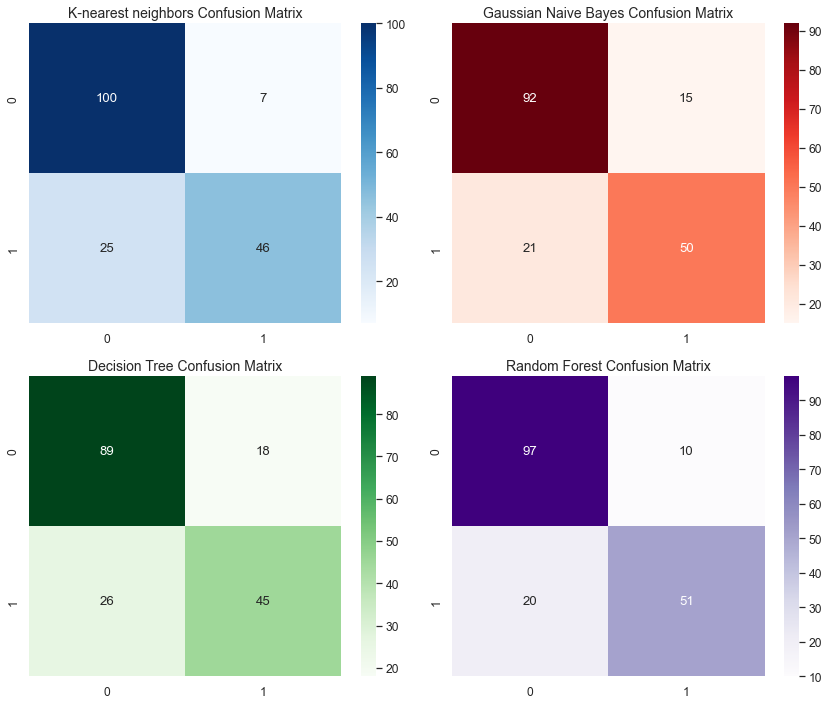

In [33]:
#Visualization of Confusion Matrix

# Visualization of Survival Rate based on Various features
cols = ['Knn','Gauss','Embarked',]

n_rows = 2
n_cols = 2

#The subplot grid and figure size of each graph
fig, axs = plt.subplots(n_rows,n_cols, figsize = (n_cols * 6, n_rows * 5))
ax1 = axs[0][0]

sns.heatmap(confusion_matrix(y_test, model[1].predict(X_test)), annot=True,fmt='', cmap='Blues',ax=ax1)
ax1.set_title("K-nearest neighbors Confusion Matrix", size=14)

ax2 = axs[0][1]
sns.heatmap(confusion_matrix(y_test, model[2].predict(X_test)), annot=True,fmt='', cmap='Reds',ax=ax2)
ax2.set_title("Gaussian Naive Bayes Confusion Matrix", size=14)

ax3 = axs[1][0]
sns.heatmap(confusion_matrix(y_test, model[3].predict(X_test)), annot=True,fmt='', cmap='Greens',ax=ax3)
ax3.set_title("Decision Tree Confusion Matrix", size=14)

ax4 = axs[1][1]
sns.heatmap(confusion_matrix(y_test, model[4].predict(X_test)), annot=True,fmt='', cmap='Purples',ax=ax4)
ax4.set_title("Random Forest Confusion Matrix", size=14)
plt.tight_layout()

**Observation and Analysis**
* Knn was the best model for predicting the passengers who died (100). 
* Random Forest was better at predicting the passengers who survived (51).
* Decision Tree had the highest Type I and Type II errors. This model made a total of 44 incorrect predictions (Type I: 18 | Type II: 26) 
* Gaussian Naive Bayes was better than Knn at predicting the passengers who survived but lower than Random Forest.
* Overall, Random Forest is the best model the survivability of the passenger as it had the highest number of correctly predicted values (148) and the lowest error (30).

